[100.0 150.0 200.0 250.0 300.0 350.0 400.0 450.0 500.0 550.0 600.0 650.0 700.0 750.0 800.0 850.0 900.0 950.0 1000.0] hectopascal
Parcel temperature at 500 hectopascal: [300.15 295.7833092025953 291.24922537630084 286.53146907934763 283.201758974029 280.5946695648783 277.72955254352985 274.55112935049965 270.9863401528638 266.9373303651419 262.2721679955759 256.8140672477359 250.3335497431428 242.55422206487347 233.1822800978848 221.93349501203238 208.46047390853354 192.0713942483007 171.06823421838564] kelvin
[334.7136302334602] kelvin
10


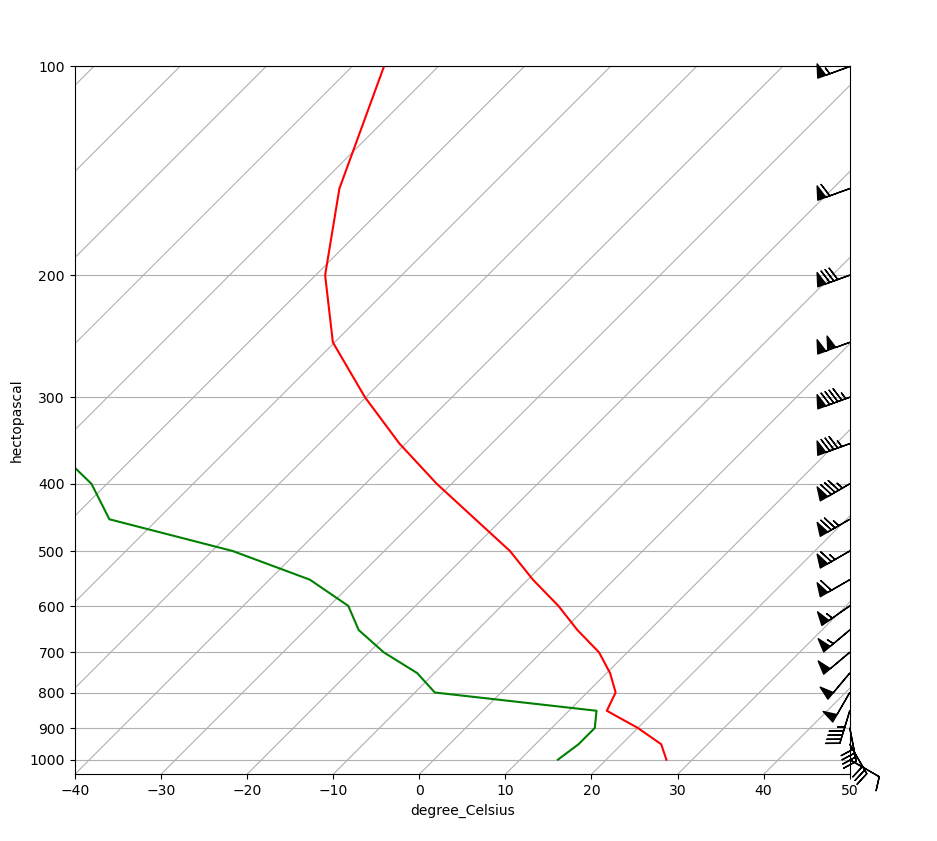

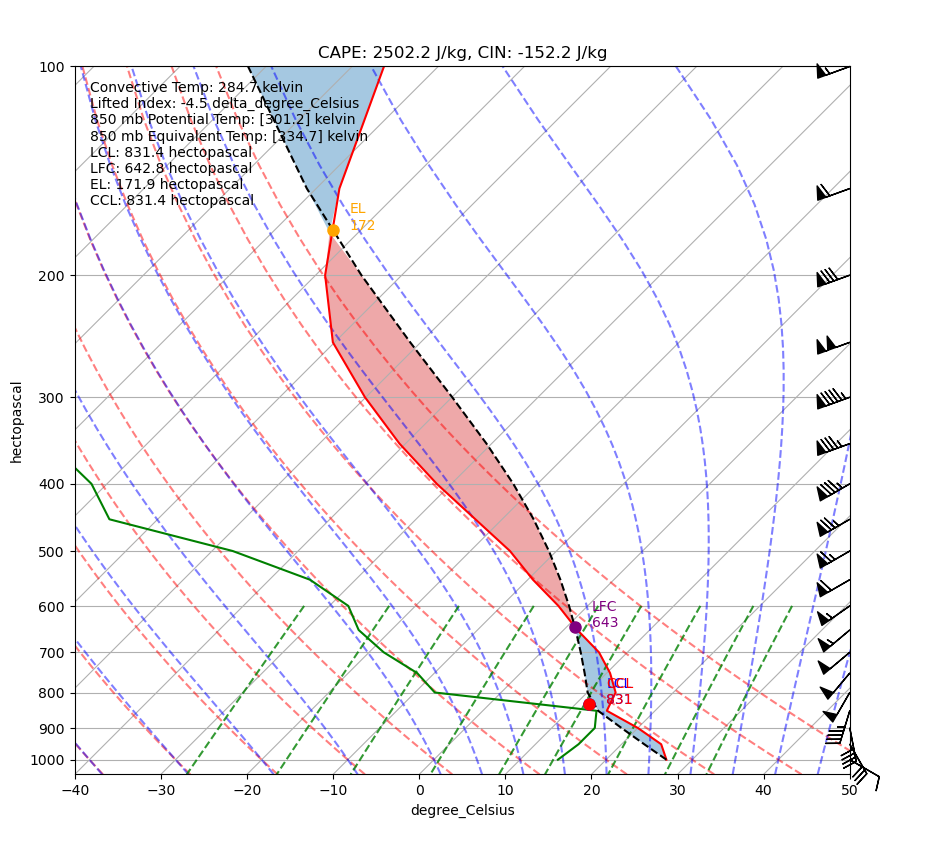

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT, Hodograph
from metpy.units import units
from metpy.calc import (wind_components, lcl, lfc, el)


data = np.array([
    [100, -86.3, -142, 250, 55],
    [150, -77.3, -126.1, 250, 60],
    [200, -68.9, -114.9, 250, 80],
    [250, -60.2, -106.1, 250, 100],
    [300, -50.1, -93.9, 250, 95],
    [350, -40.7, -81.3, 250, 85],
    [400, -31.7, -71.8, 240, 85],
    [450, -23.1, -65.6, 240, 75],
    [500, -15.4, -47.6, 240, 65],
    [550, -9.4, -35.3, 240, 60],
    [600, -3.4, -27.8, 235, 55],
    [650, 1.6, -23.8, 230, 54],
    [700, 6.7, -18.3, 230, 50],
    [750, 10.4, -12, 220, 48],
    [800, 13.3, -7.7, 210, 48],
    [850, 14.4, 13.2, 197, 45],
    [900, 20, 15, 169, 40],
    [950, 24.6, 15, 150, 30],
    [1000, 27, 14.4, 120, 10],
])


pressure = data[:, 0] * units.hPa
print(pressure)
temperature = data[:, 1] * units.degC
dewpoint = data[:, 2] * units.degC
wind_dir = data[:, 3] * units.degrees
wind_speed = data[:, 4] * units.knots


u, v = wind_components(wind_speed, wind_dir)


fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig, rotation=45)

# Plot Skew-T elements
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot_barbs(pressure, u, v)


from metpy.calc import parcel_profile, surface_based_cape_cin
from metpy.plots import SkewT
from metpy.units import units
import numpy as np
import matplotlib.pyplot as plt

# (same data loading as before — shortened here for clarity)
pressure = data[:, 0] * units.hPa
temperature = data[:, 1] * units.degC
dewpoint = data[:, 2] * units.degC
wind_dir = data[:, 3] * units.degrees
wind_speed = data[:, 4] * units.knots
u, v = wind_components(wind_speed, wind_dir)

# Sort data by decreasing pressure
sort_idx = np.argsort(pressure)[::-1]  # reverse for descending order

pressure = pressure[sort_idx]
temperature = temperature[sort_idx]
dewpoint = dewpoint[sort_idx]
u = u[sort_idx]
v = v[sort_idx]

# Compute the parcel profile
parcel_prof = parcel_profile(pressure, temperature[0], dewpoint[0])

# LCL
lcl_p, lcl_t = lcl(pressure[0], temperature[0], dewpoint[0])

# CAPE/CIN
cape, cin = surface_based_cape_cin(pressure, temperature, dewpoint)

# LFC/EL via dedicated functions
lfc_p, lfc_t = lfc(pressure, temperature, dewpoint)
el_p, el_t = el(pressure, temperature, dewpoint)

# Plot Skew-T
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig, rotation=45)

# Plot temperature, dewpoint, parcel
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot(pressure, parcel_prof, 'k', linestyle='--')

# Shade CAPE and CIN areas
skew.shade_cape(pressure, temperature, parcel_prof)
skew.shade_cin(pressure, temperature, parcel_prof)

# Wind barbs
skew.plot_barbs(pressure, u, v)

# Add relevant lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Title with CAPE/CIN values
plt.title(f'CAPE: {cape.to("J/kg").m:.1f} J/kg, CIN: {cin.to("J/kg").m:.1f} J/kg')

# Add relevant lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

from metpy.calc import lcl
from metpy.units import units

# Define surface temperature and dewpoint
surface_temp = temperature[0].to('degC')
surface_dewpoint = dewpoint[0].to('degC')

# Calculate the LCL (which is similar but based on lifting a parcel)
lcl_pressure, lcl_temperature = lcl(pressure[0], surface_temp, surface_dewpoint)

# CCL is typically found by following the mixing ratio line from the surface dewpoint
ccl_pressure = lcl_pressure.to('hPa')  # Approximate method
ccl_temperature = lcl_temperature.to('degC')  # Approximate method

from metpy.calc import dry_lapse
from metpy.units import units

# Combine pressure levels into a Pint Quantity array explicitly
pressures = units.Quantity([pressure[0].to('hPa').magnitude, lcl_p.to('hPa').magnitude], units.hPa)

# Define surface temperature as a Pint Quantity
start_temp = temperature[0].to('degC')  # Explicitly ensure units are degrees Celsius

# Calculate the convective temperature profile along the dry adiabat
convective_temp_profile = dry_lapse(pressures, start_temp)

# Extract the convective temperature at the LCL
convective_temp = convective_temp_profile[-1]

li_pressure = 500 * units.hPa  # Pressure at which to calculate LI

# Convert pressure level to a numeric value (strip units) and reattach the units properly
pressure_levels = np.array([li_pressure.magnitude]) * units.hPa



# Ensure temperature and dewpoint have the correct units
surface_temp = temperature[0].to('degC')  # Convert to degrees Celsius
surface_dewpoint = dewpoint[0].to('degC')     # Convert to degrees Celsius

# Calculate the parcel temperature profile
parcel_temp_at_li = parcel_profile(pressure, surface_temp, surface_dewpoint)

# Output parcel temperature
print(f"Parcel temperature at {li_pressure}: {parcel_temp_at_li}")

# Extract the parcel temperature at 500 hPa
parcel_temp_500 = parcel_temp_at_li[10]

LI =  temperature[10] - parcel_temp_500.to('degC') 
#print(parcel_temp_at_li.to('degC'))
#LI = LI.to('degC')
#print(LI)

from metpy.calc import potential_temperature
theta_850 = potential_temperature(pressure[pressure == 850 * units.hPa], temperature[pressure == 850 * units.hPa])

from metpy.calc import equivalent_potential_temperature
theta_e = equivalent_potential_temperature(pressure[pressure == 850 * units.hPa], temperature[pressure == 850 * units.hPa], dewpoint[pressure == 850 * units.hPa])

#convective_temp = convective_temp.to('degC')
#parcel_temp_at_li = parcel_temp_at_li.to('degC')
#theta_850 = theta_850.to('degC')
#theta_e = theta_e.to('degC')

def annotate_level(p, t, label, color):
    skew.plot(p, t, marker='o', color=color, markersize=8)
    skew.ax.text(t.magnitude + 2, p.magnitude, f'{label}\n{p.magnitude:.0f}', color=color, fontsize=10)
    

annotate_level(lcl_p, lcl_t, 'LCL', 'blue')
annotate_level(lfc_p, lfc_t, 'LFC', 'purple')
annotate_level(el_p, el_t, 'EL', 'orange')
annotate_level(ccl_pressure, ccl_temperature, 'CCL', 'red')
#annotate_level(lcl_p, convective_temp, 'Convective Temp', 'brown')
#annotate_level(li_pressure, parcel_temp_at_li[0], 'Lifted Index', 'green')
#annotate_level(850 * units.hPa, theta_850, '850mb Potential Temp', 'blue')
#annotate_level(850 * units.hPa, theta_e, '850mb Equivalent Temp', 'red')

from matplotlib import pyplot as plt

# Add these values to the plot as text
text_x = 0.02  # X-coordinate for text placement (normalized coordinates)
text_y = 0.98  # Y-coordinate for text placement (normalized coordinates)

print(theta_e)

skew.ax.text(
    text_x, text_y,
    f"Convective Temp: {convective_temp:.1f} \n"
    f"Lifted Index: {LI:.1f} \n"
    f"850 mb Potential Temp: {theta_850:.1f} \n"
    f"850 mb Equivalent Temp: {theta_e:.1f} \n"
    f"LCL: {lcl_p:.1f} \n"
    f"LFC: {lfc_p:.1f} \n"
    f"EL: {el_p:.1f} \n" 
    f"CCL: {ccl_pressure:.1f} ",
    transform=skew.ax.transAxes,  # Places text in normalized axes coordinates
    fontsize=10, color="black", verticalalignment="top"
)

# Step 5: Add a hodograph inset
#ax_hod = fig.add_axes([0.65, 0.65, 0.25, 0.25])  # [left, bottom, width, height]
#h = Hodograph(ax_hod, component_range=100)
#h.add_grid(increment=20)
#h.plot(u, v, color='blue')

def meanlist(list):
    return sum(list[:10])/len(list[:10])

# Calculate real storm motion instead of this
storm_motion_u = meanlist(u)
storm_motion_v = meanlist(v) 

# Plot storm motion
#h.ax.plot(storm_motion_u.magnitude, storm_motion_v.magnitude, 'ro', label='Storm Motion')

from metpy.calc import storm_relative_helicity

# Compute storm-relative vectors
u_rel = u - storm_motion_u
v_rel = v - storm_motion_v

# Plot vectors from storm motion to each hodograph point
#for i in range(len(u)):
    #h.ax.arrow(storm_motion_u.m, storm_motion_v.m,
            # (u[i] - storm_motion_u).m, (v[i] - storm_motion_v).m,
            # head_width=1.5, head_length=3, fc='blue', ec='cyan', alpha=.7)
    
shearvec = []
n=0

def average_vectors(vectors):
  if not vectors:
    return np.array([])
  
  return np.mean(vectors, axis=0)


for i in u[:10]:
    vecsum =[0,0]
    m=0
    for j in u[:10]:
        vectors = []
        base = [i.m, v[n].m]
        rel = [j.m, v[m].m]
        comb = [base[0] - rel[0], base[1]-rel[1]]
        vectors.append(comb)
        #shearvec.append(average_vectors(vectors))
        m=m+1
    shearvec.append(average_vectors(vectors))
    n=n+1

def perpvec(vector):
    return np.array([-vector[1], vector[0]])


print(len(shearvec))
#for i in range(len(shearvec)):
    #print(shearvec[i][0])
   # h.ax.arrow(u[i], v[i],
            # (shearvec[i][0]), (shearvec[i][1]),
            # head_width=7, head_length=15, fc='red', ec='red', alpha=.7)

#for i in range(len(shearvec)):
    #tempvec = perpvec(shearvec[i])
    #h.ax.arrow(u[i], v[i],
            # (tempvec[0]), (tempvec[1]),
            # head_width=7, head_length=15, fc='yellow', ec='yellow', alpha=.7)

# Shade regions on the hodograph
#h.ax.fill_betweenx([0, 1000], -10, 10, color='blue', alpha=0.3, label='0-1 km Helicity')
#h.ax.fill_betweenx([0, 3000], -10, 10, color='red', alpha=0.3, label='0-3 km Helicity')

plt.show()

[0.11082463191827029 0.5400457639046174 0.9879671974242984 1.4565139962849931 1.947937573358978 2.464895554945448 3.010558025783667 3.588751462706507 4.204157802769398 4.862596384290676 5.571434423209202 6.340204302290991 7.181568453172953 8.112900062019325 9.159028242671463 10.357375151717509 11.768573960438642 13.501714709781766 15.788845929720818] kilometer
-8.660254037844387
4.999999999999998
-7.632359815061799
39.26508733790656
24.000000000000007
41.569219381653056
38.3022221559489
32.13938048432697
64.95190528383289
37.500000000000036


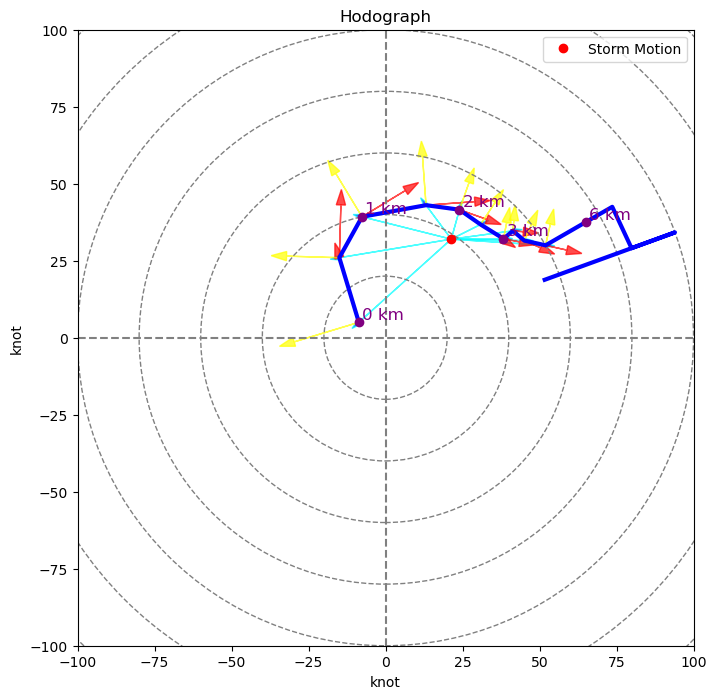

In [123]:
from metpy.plots import Hodograph
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units

# Assuming u and v have been computed already as wind components
# If not, you can extract u, v from the wind speed and direction (like in your code)
u = u  # Wind component u (zonal)
v = v  # Wind component v (meridional)

# Create a new figure for the hodograph
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Create the Hodograph object with the new name "hodo"
hodo = Hodograph(ax, component_range=100)

# Plot the wind vectors on the hodograph
hodo.add_grid(increment=20)
hodo.plot(u, v, color='blue')

# Calculate and plot storm motion (mean of the first 10 wind vectors)
def meanlist(lst):
    return sum(lst[:10]) / len(lst[:10])

storm_motion_u = meanlist(u)
storm_motion_v = meanlist(v)

# Plot the storm motion
ax.plot(storm_motion_u.magnitude, storm_motion_v.magnitude, 'ro', label='Storm Motion')

# Compute storm-relative vectors and plot them
u_rel = u[:10] - storm_motion_u
v_rel = v[:10] - storm_motion_v

for i in range(len(u[:10])):
    ax.arrow(storm_motion_u.m, storm_motion_v.m,
             (u[i] - storm_motion_u).m, (v[i] - storm_motion_v).m,
             head_width=1.5, head_length=3, fc='blue', ec='cyan', alpha=.7)

# Optionally, you can calculate and plot shear vectors as well
shearvec = []

def average_vectors(vectors):
    if not vectors:
        return np.array([])
    return abs(np.mean(vectors, axis=0))

#for i in u[:10]:
    #vecsum = [0, 0]
   # m = 0
   # for j in u[:10]:
        #vectors = []
       # base = [i.m, v[n].m]
        #print(v[m])
        #print(j.m)
       # rel = [j.m, v[m].m]
       # comb = [base[0] - rel[0], base[1] - rel[1]]
        #print(comb)
       # vectors.append(comb)
       # m = m + 1
   # print(average_vectors(vectors))
    #shearvec.append(average_vectors(vectors))

# Compute derivatives to get slope of tangent vector (central differences)
du = np.gradient(u[:10])
dv = np.gradient(v[:10])

#print(du[1])
# Tangent vector at each point: (du/ds, dv/ds)
# You could normalize it to unit vectors if needed
tangent_vectors = np.vstack((du, dv)).T

scale=1

# Plot shear vectors (red)
for i in range(len(du)):
    ax.arrow(u[i], v[i],
             (du[i]*scale), (dv[i]*scale),
             head_width=3, head_length=5, fc='red', ec='red', alpha=.7)

def perpvec(vector):
    return np.array([-vector[1].m, vector[0].m])

for i in range(len(du)):
    tempvec = perpvec(tangent_vectors[i])
    hodo.ax.arrow(u[i], v[i],
             (tempvec[0]), (tempvec[1]),
             head_width=3, head_length=5, fc='yellow', ec='yellow', alpha=.7)

heights = [0,1000,2000,3000]*units.m
import metpy.calc as mpcalc
*_, total_helicity1 = mpcalc.storm_relative_helicity(heights[:2], u[:2], v[:2], depth=1 * units.km,
                                                     storm_u=storm_motion_u, storm_v=storm_motion_v)
*_, total_helicity3 = mpcalc.storm_relative_helicity(heights[:4], u[:4], v[:4], depth=3 * units.km,
                                                     storm_u=storm_motion_u, storm_v=storm_motion_v)

#print(total_helicity1)
#print(total_helicity3)

from metpy.calc import pressure_to_height_std

height = pressure_to_height_std(pressure)
print(height)

key_heights = [0,1,2,3,6]
# Plot markers at selected heights
for h in key_heights:
    idx = np.argmin(np.abs(height.m - h))  # Find closest actual height
    u_mark = u[idx].magnitude
    print(u_mark)
    v_mark = v[idx].magnitude
    print(v_mark)
    label = f"{h} km"
    ax.plot(u_mark, v_mark, 'o', color='purple')
    ax.text(u_mark + 1, v_mark + 1, label, color='purple', fontsize=12)

plt.title("Hodograph")
plt.legend(loc='upper right')
plt.show()


[100.0 150.0 200.0 250.0 300.0 350.0 400.0 450.0 500.0 550.0 600.0 650.0 700.0 750.0 800.0 850.0 900.0 950.0 1000.0] hectopascal
Parcel temperature at 500 hectopascal: [300.15 295.7833092025953 291.24922537630084 286.53146907934763 283.201758974029 280.5946695648783 277.72955254352985 274.55112935049965 270.9863401528638 266.9373303651419 262.2721679955759 256.8140672477359 250.3335497431428 242.55422206487347 233.1822800978848 221.93349501203238 208.46047390853354 192.0713942483007 171.06823421838564] kelvin
[334.7136302334602] kelvin
10


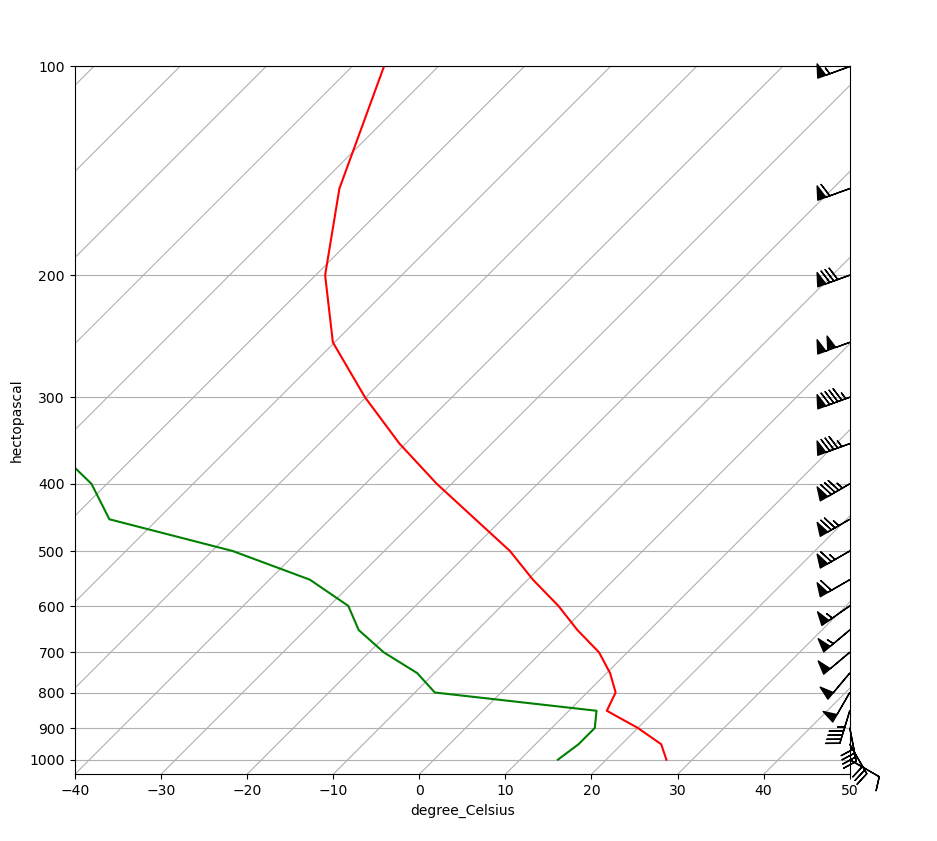

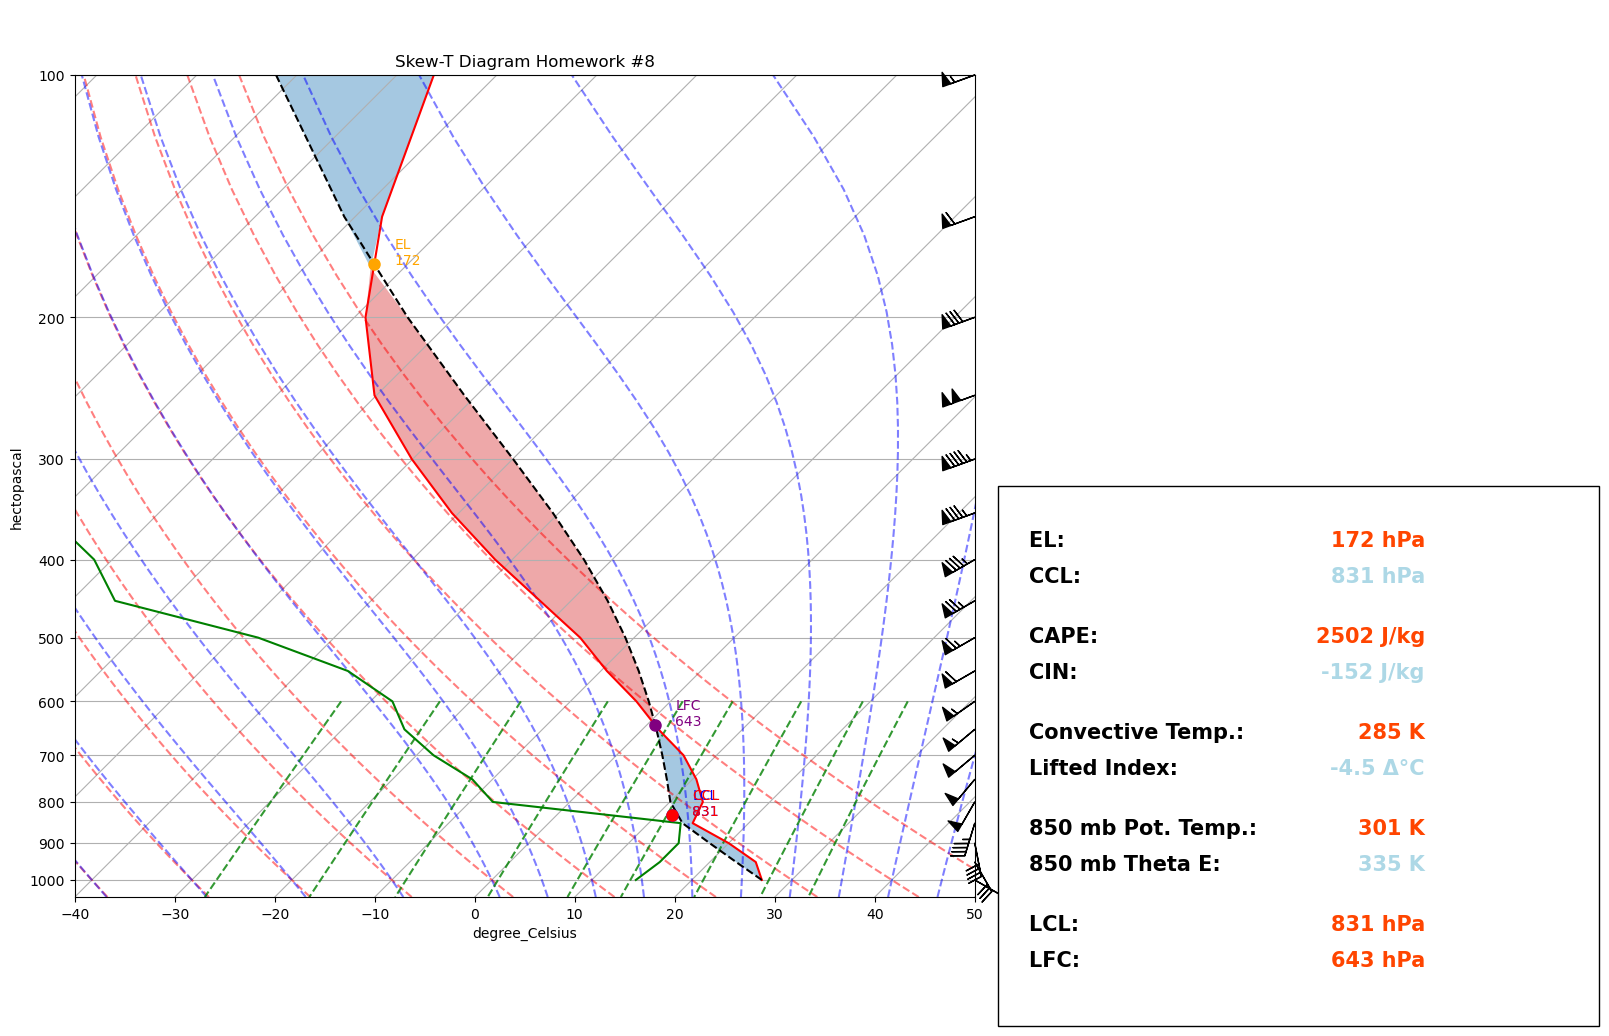

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT, Hodograph
from metpy.units import units
from metpy.calc import (wind_components, lcl, lfc, el)


data = np.array([
    [100, -86.3, -142, 250, 55],
    [150, -77.3, -126.1, 250, 60],
    [200, -68.9, -114.9, 250, 80],
    [250, -60.2, -106.1, 250, 100],
    [300, -50.1, -93.9, 250, 95],
    [350, -40.7, -81.3, 250, 85],
    [400, -31.7, -71.8, 240, 85],
    [450, -23.1, -65.6, 240, 75],
    [500, -15.4, -47.6, 240, 65],
    [550, -9.4, -35.3, 240, 60],
    [600, -3.4, -27.8, 235, 55],
    [650, 1.6, -23.8, 230, 54],
    [700, 6.7, -18.3, 230, 50],
    [750, 10.4, -12, 220, 48],
    [800, 13.3, -7.7, 210, 48],
    [850, 14.4, 13.2, 197, 45],
    [900, 20, 15, 169, 40],
    [950, 24.6, 15, 150, 30],
    [1000, 27, 14.4, 120, 10],
])


pressure = data[:, 0] * units.hPa
print(pressure)
temperature = data[:, 1] * units.degC
dewpoint = data[:, 2] * units.degC
wind_dir = data[:, 3] * units.degrees
wind_speed = data[:, 4] * units.knots


u, v = wind_components(wind_speed, wind_dir)


fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig, rotation=45)

# Plot Skew-T elements
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot_barbs(pressure, u, v)


from metpy.calc import parcel_profile, surface_based_cape_cin
from metpy.plots import SkewT
from metpy.units import units
import numpy as np
import matplotlib.pyplot as plt

# (same data loading as before — shortened here for clarity)
pressure = data[:, 0] * units.hPa
temperature = data[:, 1] * units.degC
dewpoint = data[:, 2] * units.degC
wind_dir = data[:, 3] * units.degrees
wind_speed = data[:, 4] * units.knots
u, v = wind_components(wind_speed, wind_dir)

# Sort data by decreasing pressure
sort_idx = np.argsort(pressure)[::-1]  # reverse for descending order

pressure = pressure[sort_idx]
temperature = temperature[sort_idx]
dewpoint = dewpoint[sort_idx]
u = u[sort_idx]
v = v[sort_idx]

# Compute the parcel profile
parcel_prof = parcel_profile(pressure, temperature[0], dewpoint[0])

# LCL
lcl_p, lcl_t = lcl(pressure[0], temperature[0], dewpoint[0])

# CAPE/CIN
cape, cin = surface_based_cape_cin(pressure, temperature, dewpoint)

# LFC/EL via dedicated functions
lfc_p, lfc_t = lfc(pressure, temperature, dewpoint)
el_p, el_t = el(pressure, temperature, dewpoint)

# Plot Skew-T
fig = plt.figure(figsize=(18, 12))
skew = SkewT(fig, rotation=45,rect=(0.05, 0.05, 0.50, 0.90))

# Plot temperature, dewpoint, parcel
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot(pressure, parcel_prof, 'k', linestyle='--')

# Shade CAPE and CIN areas
skew.shade_cape(pressure, temperature, parcel_prof)
skew.shade_cin(pressure, temperature, parcel_prof)

# Wind barbs
skew.plot_barbs(pressure, u, v)

# Add relevant lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Title with CAPE/CIN values
plt.title(f'Skew-T Diagram Homework #8')

# Add relevant lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

from metpy.calc import lcl
from metpy.units import units

# Define surface temperature and dewpoint
surface_temp = temperature[0].to('degC')
surface_dewpoint = dewpoint[0].to('degC')

# Calculate the LCL (which is similar but based on lifting a parcel)
lcl_pressure, lcl_temperature = lcl(pressure[0], surface_temp, surface_dewpoint)

# CCL is typically found by following the mixing ratio line from the surface dewpoint
ccl_pressure = lcl_pressure.to('hPa')  # Approximate method
ccl_temperature = lcl_temperature.to('degC')  # Approximate method

from metpy.calc import dry_lapse
from metpy.units import units

# Combine pressure levels into a Pint Quantity array explicitly
pressures = units.Quantity([pressure[0].to('hPa').magnitude, lcl_p.to('hPa').magnitude], units.hPa)

# Define surface temperature as a Pint Quantity
start_temp = temperature[0].to('degC')  # Explicitly ensure units are degrees Celsius

# Calculate the convective temperature profile along the dry adiabat
convective_temp_profile = dry_lapse(pressures, start_temp)

# Extract the convective temperature at the LCL
convective_temp = convective_temp_profile[-1]

li_pressure = 500 * units.hPa  # Pressure at which to calculate LI

# Convert pressure level to a numeric value (strip units) and reattach the units properly
pressure_levels = np.array([li_pressure.magnitude]) * units.hPa



# Ensure temperature and dewpoint have the correct units
surface_temp = temperature[0].to('degC')  # Convert to degrees Celsius
surface_dewpoint = dewpoint[0].to('degC')     # Convert to degrees Celsius

# Calculate the parcel temperature profile
parcel_temp_at_li = parcel_profile(pressure, surface_temp, surface_dewpoint)

# Output parcel temperature
print(f"Parcel temperature at {li_pressure}: {parcel_temp_at_li}")

# Extract the parcel temperature at 500 hPa
parcel_temp_500 = parcel_temp_at_li[10]

LI =  temperature[10] - parcel_temp_500.to('degC') 
#print(parcel_temp_at_li.to('degC'))
#LI = LI.to('degC')
#print(LI)

from metpy.calc import potential_temperature
theta_850 = potential_temperature(pressure[pressure == 850 * units.hPa], temperature[pressure == 850 * units.hPa])

from metpy.calc import equivalent_potential_temperature
theta_e = equivalent_potential_temperature(pressure[pressure == 850 * units.hPa], temperature[pressure == 850 * units.hPa], dewpoint[pressure == 850 * units.hPa])

#convective_temp = convective_temp.to('degC')
#parcel_temp_at_li = parcel_temp_at_li.to('degC')
#theta_850 = theta_850.to('degC')
#theta_e = theta_e.to('degC')

def annotate_level(p, t, label, color):
    skew.plot(p, t, marker='o', color=color, markersize=8)
    skew.ax.text(t.magnitude + 2, p.magnitude, f'{label}\n{p.magnitude:.0f}', color=color, fontsize=10)
    

annotate_level(lcl_p, lcl_t, 'LCL', 'blue')
annotate_level(lfc_p, lfc_t, 'LFC', 'purple')
annotate_level(el_p, el_t, 'EL', 'orange')
annotate_level(ccl_pressure, ccl_temperature, 'CCL', 'red')
#annotate_level(lcl_p, convective_temp, 'Convective Temp', 'brown')
#annotate_level(li_pressure, parcel_temp_at_li[0], 'Lifted Index', 'green')
#annotate_level(850 * units.hPa, theta_850, '850mb Potential Temp', 'blue')
#annotate_level(850 * units.hPa, theta_e, '850mb Equivalent Temp', 'red')

from matplotlib import pyplot as plt

# Add these values to the plot as text
text_x = 0.02  # X-coordinate for text placement (normalized coordinates)
text_y = 0.98  # Y-coordinate for text placement (normalized coordinates)

print(theta_e)

#skew.ax.text(
 #   text_x, text_y,
  #  f"Convective Temp: {convective_temp:.1f} \n"
   # f"Lifted Index: {LI:.1f} \n"
   # f"850 mb Potential Temp: {theta_850:.1f} \n"
   # f"850 mb Equivalent Temp: {theta_e:.1f} \n"
   # f"LCL: {lcl_p:.1f} \n"
   # f"LFC: {lfc_p:.1f} \n"
   # f"EL: {el_p:.1f} \n" 
   # f"CCL: {ccl_pressure:.1f} ",
   # transform=skew.ax.transAxes,  # Places text in normalized axes coordinates
   # fontsize=10, color="black", verticalalignment="top"
#)

# Step 5: Add a hodograph inset
#ax_hod = fig.add_axes([0.65, 0.65, 0.25, 0.25])  # [left, bottom, width, height]
#h = Hodograph(ax_hod, component_range=100)
#h.add_grid(increment=20)
#h.plot(u, v, color='blue')

def meanlist(list):
    return sum(list[:10])/len(list[:10])

# Calculate real storm motion instead of this
storm_motion_u = meanlist(u)
storm_motion_v = meanlist(v) 

# Plot storm motion
#h.ax.plot(storm_motion_u.magnitude, storm_motion_v.magnitude, 'ro', label='Storm Motion')

from metpy.calc import storm_relative_helicity

# Compute storm-relative vectors
u_rel = u - storm_motion_u
v_rel = v - storm_motion_v

# Plot vectors from storm motion to each hodograph point
#for i in range(len(u)):
    #h.ax.arrow(storm_motion_u.m, storm_motion_v.m,
            # (u[i] - storm_motion_u).m, (v[i] - storm_motion_v).m,
            # head_width=1.5, head_length=3, fc='blue', ec='cyan', alpha=.7)
    
shearvec = []
n=0

def average_vectors(vectors):
  if not vectors:
    return np.array([])
  
  return np.mean(vectors, axis=0)


for i in u[:10]:
    vecsum =[0,0]
    m=0
    for j in u[:10]:
        vectors = []
        base = [i.m, v[n].m]
        rel = [j.m, v[m].m]
        comb = [base[0] - rel[0], base[1]-rel[1]]
        vectors.append(comb)
        #shearvec.append(average_vectors(vectors))
        m=m+1
    shearvec.append(average_vectors(vectors))
    n=n+1

def perpvec(vector):
    return np.array([-vector[1], vector[0]])


print(len(shearvec))
#for i in range(len(shearvec)):
    #print(shearvec[i][0])
   # h.ax.arrow(u[i], v[i],
            # (shearvec[i][0]), (shearvec[i][1]),
            # head_width=7, head_length=15, fc='red', ec='red', alpha=.7)

#for i in range(len(shearvec)):
    #tempvec = perpvec(shearvec[i])
    #h.ax.arrow(u[i], v[i],
            # (tempvec[0]), (tempvec[1]),
            # head_width=7, head_length=15, fc='yellow', ec='yellow', alpha=.7)

# Shade regions on the hodograph
#h.ax.fill_betweenx([0, 1000], -10, 10, color='blue', alpha=0.3, label='0-1 km Helicity')
#h.ax.fill_betweenx([0, 3000], -10, 10, color='red', alpha=0.3, label='0-3 km Helicity')

fig.patches.extend([plt.Rectangle((0.563, 0.05), 0.334, 0.45,
                                  edgecolor='black', facecolor='white',
                                  linewidth=1, alpha=1, transform=fig.transFigure,
                                  figure=fig)])

plt.figtext(0.58, 0.45, 'EL: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.45, f'{el_p:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.42, 'CCL: ', weight='bold',
            fontsize=15, color='black', ha='left')
plt.figtext(0.8, 0.42, f'{ccl_pressure:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')

plt.figtext(0.58, 0.37, 'CAPE: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.37, f'{cape:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.34, 'CIN: ', weight='bold',
            fontsize=15, color='black', ha='left')
plt.figtext(0.8, 0.34, f'{cin:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.29, 'Convective Temp.: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.29, f'{convective_temp:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.26, 'Lifted Index: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.26, f'{LI:.1f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.21, '850 mb Pot. Temp.: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.21, f'{theta_850[0]:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.18, '850 mb Theta E: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.18, f'{theta_e[0]:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.13, 'LCL: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.13, f'{lcl_p:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.10, 'LFC: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.8, 0.10, f'{lfc_p:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')


plt.show()